In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown
from allennlp.data.tokenizers import SpacyTokenizer

# Data exploration for SemEval 2020 Task 11 dataset

## Span identification

Explore the distribution of propaganda span lengths over the entire training set.

In [212]:
def plot_hist(data, bins, max_y):
    
    plt.hist(data, bins = bins, density=False, facecolor='g', alpha=0.75)

    lens = np.array(data)
    quant_50, quant_75, quant_95 =  np.quantile(data, 0.5), np.quantile(data, 0.75), np.quantile(data, 0.95)

    quants = [quant_50, quant_75, quant_95]
    labels = ["50th percentile", "75th percentile", "95th percentile"]
    for i in range(len(quants)):
        plt.plot([quants[i]]*2, [0,max_y], linestyle = ":", label=labels[i], )
    plt.legend(loc="upper right")
    plt.show()

In [221]:
lens = list()
sentences = dict()
with os.scandir("../shared-task/datasets/train-labels-task-si/") as articles:
    for article in articles:
        content: str = None
        gold_spans: list()
        name = article.name.split(".")[0]
        sentences[name] = list()

        with open(article, 'r') as file:
            content = file.read()
        
        for line in content.splitlines():
            gold_spans = line.split("\t")
            low = int(gold_spans[1])
            up = int(gold_spans[2])
            sentences[name].append((low, up))
            length =  up - low
            lens.append(length)

In [191]:
import spacy
nlp = spacy.load('en_core_web_sm')

span_token_lens = list()
tags_freq = dict()
sents_number = list()
one_token = dict()

for id, article in sentences.items():
    with open("../shared-task/datasets/train-articles/"+id+".txt", 'r') as file:
        content = file.read()
    for span in article:
        # get propaganda span text
        text = content[span[0]:span[1]]
        # check # of sentences in the span
        span_sentences = [i for i in nlp(text).sents]
        sents_number.append(len(span_sentences)) 
        
        # tokenize the text
        tokens = SpacyTokenizer().tokenize(text)
        # get number of tokens in the span
        span_token_lens.append(len(tokens))
        # get tags in 1-token spans
        if len(tokens) == 1:
            if not tokens[0].tag_ in one_token:
                one_token[tokens[0].tag_] = 1
            else:
                one_token[tokens[0].tag_] += 1

        for tok in tokens:
            if not tok.tag_ in tags_freq:
                tags_freq[tok.tag_] = 1
            else:
                tags_freq[tok.tag_] += 1        

### Number of characters in ech span in the training data.

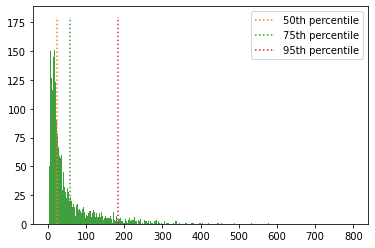

<Figure size 432x288 with 0 Axes>

In [223]:
plot_hist(lens, max(lens)-min(lens),  max_y = 180)
plt.savefig('graphs/character_distribution.pdf')
plt.show()

### Number of tokens for span in training set data.

Minimum number of tokens for span:  1
Number of 1-token spans in training data:  804
Maximum number of tokens for span:  160
Mean number of tokens for span:  9.303218727139722


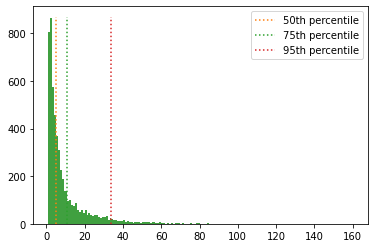

<Figure size 432x288 with 0 Axes>

In [224]:
print("Minimum number of tokens for span: ", min(span_token_lens))
unique, count = np.unique(span_token_lens, return_counts=True)
print("Number of 1-token spans in training data: ", count[0])
print("Maximum number of tokens for span: ", max(span_token_lens))
print("Mean number of tokens for span: ", np.mean(span_token_lens))
plot_hist(span_token_lens, max(span_token_lens)-min(span_token_lens), max_y = 870)
plt.savefig('graphs/tokens_span.pdf')

### Number of sentences for span in training set data.

In [ ]:
# saved graph
#plot_hist(sents_number, bins=np.arange(max(sents_number)+2)-0.5, max_y = 1, max_x = 800, show_perc=False, show_labels=True)

### Token category for one-token spans.
Print the occurrence of the categories of tokens in spans composed by only one token. 

In [206]:
for key, value in one_token.items():
    print(explain(key), " : ", value)

verb, base form  :  36
adjective (English), other noun-modifier (Chinese)  :  235
noun, proper singular  :  49
verb, gerund or present participle  :  65
noun, singular or mass  :  164
verb, past participle  :  29
noun, proper plural  :  10
verb, past tense  :  63
noun, plural  :  61
adverb  :  53
interjection  :  2
adjective, comparative  :  4
cardinal number  :  3
conjunction, subordinating or preposition  :  2
pronoun, possessive  :  13
determiner  :  4
adjective, superlative  :  2
verb, non-3rd person singular present  :  7
adverb, comparative  :  2


In [193]:
def explain(term):
    """Get a description for a given POS tag, dependency label or entity type.

    term (str): The term to explain.
    RETURNS (str): The explanation, or `None` if not found in the glossary.

    EXAMPLE:
        >>> spacy.explain(u'NORP')
        >>> doc = nlp(u'Hello world')
        >>> print([w.text, w.tag_, spacy.explain(w.tag_) for w in doc])
    """
    if term in GLOSSARY:
        return GLOSSARY[term]


GLOSSARY = {
    # POS tags
    # Universal POS Tags
    # http://universaldependencies.org/u/pos/
    "ADJ": "adjective",
    "ADP": "adposition",
    "ADV": "adverb",
    "AUX": "auxiliary",
    "CONJ": "conjunction",
    "CCONJ": "coordinating conjunction",
    "DET": "determiner",
    "INTJ": "interjection",
    "NOUN": "noun",
    "NUM": "numeral",
    "PART": "particle",
    "PRON": "pronoun",
    "PROPN": "proper noun",
    "PUNCT": "punctuation",
    "SCONJ": "subordinating conjunction",
    "SYM": "symbol",
    "VERB": "verb",
    "X": "other",
    "EOL": "end of line",
    "SPACE": "space",
    # POS tags (English)
    # OntoNotes 5 / Penn Treebank
    # https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
    ".": "punctuation mark, sentence closer",
    ",": "punctuation mark, comma",
    "-LRB-": "left round bracket",
    "-RRB-": "right round bracket",
    "``": "opening quotation mark",
    '""': "closing quotation mark",
    "''": "closing quotation mark",
    ":": "punctuation mark, colon or ellipsis",
    "$": "symbol, currency",
    "#": "symbol, number sign",
    "AFX": "affix",
    "CC": "conjunction, coordinating",
    "CD": "cardinal number",
    "DT": "determiner",
    "EX": "existential there",
    "FW": "foreign word",
    "HYPH": "punctuation mark, hyphen",
    "IN": "conjunction, subordinating or preposition",
    "JJ": "adjective (English), other noun-modifier (Chinese)",
    "JJR": "adjective, comparative",
    "JJS": "adjective, superlative",
    "LS": "list item marker",
    "MD": "verb, modal auxiliary",
    "NIL": "missing tag",
    "NN": "noun, singular or mass",
    "NNP": "noun, proper singular",
    "NNPS": "noun, proper plural",
    "NNS": "noun, plural",
    "PDT": "predeterminer",
    "POS": "possessive ending",
    "PRP": "pronoun, personal",
    "PRP$": "pronoun, possessive",
    "RB": "adverb",
    "RBR": "adverb, comparative",
    "RBS": "adverb, superlative",
    "RP": "adverb, particle",
    "TO": 'infinitival "to"',
    "UH": "interjection",
    "VB": "verb, base form",
    "VBD": "verb, past tense",
    "VBG": "verb, gerund or present participle",
    "VBN": "verb, past participle",
    "VBP": "verb, non-3rd person singular present",
    "VBZ": "verb, 3rd person singular present",
    "WDT": "wh-determiner",
    "WP": "wh-pronoun, personal",
    "WP$": "wh-pronoun, possessive",
    "WRB": "wh-adverb",
    "SP": "space (English), sentence-final particle (Chinese)",
    "ADD": "email",
    "NFP": "superfluous punctuation",
    "GW": "additional word in multi-word expression",
    "XX": "unknown",
    "BES": 'auxiliary "be"',
    "HVS": 'forms of "have"',
    "_SP": "whitespace",
    # POS Tags (German)
    # TIGER Treebank
    # http://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/TIGERCorpus/annotation/tiger_introduction.pdf
    "$(": "other sentence-internal punctuation mark",
    "$,": "comma",
    "$.": "sentence-final punctuation mark",
    "ADJA": "adjective, attributive",
    "ADJD": "adjective, adverbial or predicative",
    "APPO": "postposition",
    "APPR": "preposition; circumposition left",
    "APPRART": "preposition with article",
    "APZR": "circumposition right",
    "ART": "definite or indefinite article",
    "CARD": "cardinal number",
    "FM": "foreign language material",
    "ITJ": "interjection",
    "KOKOM": "comparative conjunction",
    "KON": "coordinate conjunction",
    "KOUI": 'subordinate conjunction with "zu" and infinitive',
    "KOUS": "subordinate conjunction with sentence",
    "NE": "proper noun",
    "NNE": "proper noun",
    "PAV": "pronominal adverb",
    "PROAV": "pronominal adverb",
    "PDAT": "attributive demonstrative pronoun",
    "PDS": "substituting demonstrative pronoun",
    "PIAT": "attributive indefinite pronoun without determiner",
    "PIDAT": "attributive indefinite pronoun with determiner",
    "PIS": "substituting indefinite pronoun",
    "PPER": "non-reflexive personal pronoun",
    "PPOSAT": "attributive possessive pronoun",
    "PPOSS": "substituting possessive pronoun",
    "PRELAT": "attributive relative pronoun",
    "PRELS": "substituting relative pronoun",
    "PRF": "reflexive personal pronoun",
    "PTKA": "particle with adjective or adverb",
    "PTKANT": "answer particle",
    "PTKNEG": "negative particle",
    "PTKVZ": "separable verbal particle",
    "PTKZU": '"zu" before infinitive',
    "PWAT": "attributive interrogative pronoun",
    "PWAV": "adverbial interrogative or relative pronoun",
    "PWS": "substituting interrogative pronoun",
    "TRUNC": "word remnant",
    "VAFIN": "finite verb, auxiliary",
    "VAIMP": "imperative, auxiliary",
    "VAINF": "infinitive, auxiliary",
    "VAPP": "perfect participle, auxiliary",
    "VMFIN": "finite verb, modal",
    "VMINF": "infinitive, modal",
    "VMPP": "perfect participle, modal",
    "VVFIN": "finite verb, full",
    "VVIMP": "imperative, full",
    "VVINF": "infinitive, full",
    "VVIZU": 'infinitive with "zu", full',
    "VVPP": "perfect participle, full",
    "XY": "non-word containing non-letter",
    # POS Tags (Chinese)
    # OntoNotes / Chinese Penn Treebank
    # https://repository.upenn.edu/cgi/viewcontent.cgi?article=1039&context=ircs_reports
    "AD": "adverb",
    "AS": "aspect marker",
    "BA": "把 in ba-construction",
    # "CD": "cardinal number",
    "CS": "subordinating conjunction",
    "DEC": "的 in a relative clause",
    "DEG": "associative 的",
    "DER": "得 in V-de const. and V-de-R",
    "DEV": "地 before VP",
    "ETC": "for words 等, 等等",
    # "FW": "foreign words"
    "IJ": "interjection",
    # "JJ": "other noun-modifier",
    "LB": "被 in long bei-const",
    "LC": "localizer",
    "M": "measure word",
    "MSP": "other particle",
    # "NN": "common noun",
    "NR": "proper noun",
    "NT": "temporal noun",
    "OD": "ordinal number",
    "ON": "onomatopoeia",
    "P": "preposition excluding 把 and 被",
    "PN": "pronoun",
    "PU": "punctuation",
    "SB": "被 in short bei-const",
    # "SP": "sentence-final particle",
    "VA": "predicative adjective",
    "VC": "是 (copula)",
    "VE": "有 as the main verb",
    "VV": "other verb",
    # Noun chunks
    "NP": "noun phrase",
    "PP": "prepositional phrase",
    "VP": "verb phrase",
    "ADVP": "adverb phrase",
    "ADJP": "adjective phrase",
    "SBAR": "subordinating conjunction",
    "PRT": "particle",
    "PNP": "prepositional noun phrase",
    # Dependency Labels (English)
    # ClearNLP / Universal Dependencies
    # https://github.com/clir/clearnlp-guidelines/blob/master/md/specifications/dependency_labels.md
    "acl": "clausal modifier of noun (adjectival clause)",
    "acomp": "adjectival complement",
    "advcl": "adverbial clause modifier",
    "advmod": "adverbial modifier",
    "agent": "agent",
    "amod": "adjectival modifier",
    "appos": "appositional modifier",
    "attr": "attribute",
    "aux": "auxiliary",
    "auxpass": "auxiliary (passive)",
    "case": "case marking",
    "cc": "coordinating conjunction",
    "ccomp": "clausal complement",
    "clf": "classifier",
    "complm": "complementizer",
    "compound": "compound",
    "conj": "conjunct",
    "cop": "copula",
    "csubj": "clausal subject",
    "csubjpass": "clausal subject (passive)",
    "dative": "dative",
    "dep": "unclassified dependent",
    "det": "determiner",
    "discourse": "discourse element",
    "dislocated": "dislocated elements",
    "dobj": "direct object",
    "expl": "expletive",
    "fixed": "fixed multiword expression",
    "flat": "flat multiword expression",
    "goeswith": "goes with",
    "hmod": "modifier in hyphenation",
    "hyph": "hyphen",
    "infmod": "infinitival modifier",
    "intj": "interjection",
    "iobj": "indirect object",
    "list": "list",
    "mark": "marker",
    "meta": "meta modifier",
    "neg": "negation modifier",
    "nmod": "modifier of nominal",
    "nn": "noun compound modifier",
    "npadvmod": "noun phrase as adverbial modifier",
    "nsubj": "nominal subject",
    "nsubjpass": "nominal subject (passive)",
    "nounmod": "modifier of nominal",
    "npmod": "noun phrase as adverbial modifier",
    "num": "number modifier",
    "number": "number compound modifier",
    "nummod": "numeric modifier",
    "oprd": "object predicate",
    "obj": "object",
    "obl": "oblique nominal",
    "orphan": "orphan",
    "parataxis": "parataxis",
    "partmod": "participal modifier",
    "pcomp": "complement of preposition",
    "pobj": "object of preposition",
    "poss": "possession modifier",
    "possessive": "possessive modifier",
    "preconj": "pre-correlative conjunction",
    "prep": "prepositional modifier",
    "prt": "particle",
    "punct": "punctuation",
    "quantmod": "modifier of quantifier",
    "rcmod": "relative clause modifier",
    "relcl": "relative clause modifier",
    "reparandum": "overridden disfluency",
    "root": "root",
    "vocative": "vocative",
    "xcomp": "open clausal complement",
    # Dependency labels (German)
    # TIGER Treebank
    # http://www.ims.uni-stuttgart.de/forschung/ressourcen/korpora/TIGERCorpus/annotation/tiger_introduction.pdf
    # currently missing: 'cc' (comparative complement) because of conflict
    # with English labels
    "ac": "adpositional case marker",
    "adc": "adjective component",
    "ag": "genitive attribute",
    "ams": "measure argument of adjective",
    "app": "apposition",
    "avc": "adverbial phrase component",
    "cd": "coordinating conjunction",
    "cj": "conjunct",
    "cm": "comparative conjunction",
    "cp": "complementizer",
    "cvc": "collocational verb construction",
    "da": "dative",
    "dh": "discourse-level head",
    "dm": "discourse marker",
    "ep": "expletive es",
    "hd": "head",
    "ju": "junctor",
    "mnr": "postnominal modifier",
    "mo": "modifier",
    "ng": "negation",
    "nk": "noun kernel element",
    "nmc": "numerical component",
    "oa": "accusative object",
    "oc": "clausal object",
    "og": "genitive object",
    "op": "prepositional object",
    "par": "parenthetical element",
    "pd": "predicate",
    "pg": "phrasal genitive",
    "ph": "placeholder",
    "pm": "morphological particle",
    "pnc": "proper noun component",
    "rc": "relative clause",
    "re": "repeated element",
    "rs": "reported speech",
    "sb": "subject",
    "sb": "subject",
    "sbp": "passivized subject (PP)",
    "sp": "subject or predicate",
    "svp": "separable verb prefix",
    "uc": "unit component",
    "vo": "vocative",
    # Named Entity Recognition
    # OntoNotes 5
    # https://catalog.ldc.upenn.edu/docs/LDC2013T19/OntoNotes-Release-5.0.pdf
    "PERSON": "People, including fictional",
    "NORP": "Nationalities or religious or political groups",
    "FACILITY": "Buildings, airports, highways, bridges, etc.",
    "FAC": "Buildings, airports, highways, bridges, etc.",
    "ORG": "Companies, agencies, institutions, etc.",
    "GPE": "Countries, cities, states",
    "LOC": "Non-GPE locations, mountain ranges, bodies of water",
    "PRODUCT": "Objects, vehicles, foods, etc. (not services)",
    "EVENT": "Named hurricanes, battles, wars, sports events, etc.",
    "WORK_OF_ART": "Titles of books, songs, etc.",
    "LAW": "Named documents made into laws.",
    "LANGUAGE": "Any named language",
    "DATE": "Absolute or relative dates or periods",
    "TIME": "Times smaller than a day",
    "PERCENT": 'Percentage, including "%"',
    "MONEY": "Monetary values, including unit",
    "QUANTITY": "Measurements, as of weight or distance",
    "ORDINAL": '"first", "second", etc.',
    "CARDINAL": "Numerals that do not fall under another type",
    # Named Entity Recognition
    # Wikipedia
    # http://www.sciencedirect.com/science/article/pii/S0004370212000276
    # https://pdfs.semanticscholar.org/5744/578cc243d92287f47448870bb426c66cc941.pdf
    "PER": "Named person or family.",
    "MISC": "Miscellaneous entities, e.g. events, nationalities, products or works of art",
    # https://github.com/ltgoslo/norne
    "EVT": "Festivals, cultural events, sports events, weather phenomena, wars, etc.",
    "PROD": "Product, i.e. artificially produced entities including speeches, radio shows, programming languages, contracts, laws and ideas",
    "DRV": "Words (and phrases?) that are dervied from a name, but not a name in themselves, e.g. 'Oslo-mannen' ('the man from Oslo')",
    "GPE_LOC": "Geo-political entity, with a locative sense, e.g. 'John lives in Spain'",
    "GPE_ORG": "Geo-political entity, with an organisation sense, e.g. 'Spain declined to meet with Belgium'",
}
